# importing necessary packages

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Collection**: Data Collected from Kaggle -> 'https://www.kaggle.com/datasets/kawsarahmad/dengue-dataset-bangladesh/data'

### **Project Aim**
The Dengue Prediction System aims to develop a machine learning model that predicts whether a person is Dengue Positive (1) or Negative (0) based on medical test results and demographic data. By analyzing features such as NS1, IgG, IgM, age, and location, the system helps in early detection of Dengue fever, enabling timely medical intervention and disease control.

### **Primary Target Audience**
**Healthcare Professionals:** Doctors, epidemiologists, and public health officials can use the system to assess a patient's risk and recommend further tests or treatment.

**Government & Health Organizations:** Helps in disease surveillance, predicting outbreaks, and allocating healthcare resources efficiently.

**Patients & General Public:** Individuals can use the system to check their risk level and take preventive measures before visiting a doctor.

In [26]:
data = pd.read_csv('../data/dengue.csv')
data.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [27]:
data.dtypes

Gender       object
Age           int64
NS1           int64
IgG           int64
IgM           int64
Area         object
AreaType     object
HouseType    object
District     object
Outcome       int64
dtype: object

In [28]:
data.describe()

,Age,NS1,IgG,IgM,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.924000,0.519000,0.533000,0.475000,0.533000
std,16.468437,0.499889,0.499159,0.499624,0.499159
min,8.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,1.000000,0.000000,1.000000
75%,50.000000,1.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#columns unique value

data['Area'].unique()

array(['Mirpur', 'Chawkbazar', 'Paltan', 'Motijheel', 'Gendaria',
       'Dhanmondi', 'New Market', 'Sher-e-Bangla Nagar', 'Kafrul',
       'Pallabi', 'Mohammadpur', 'Shahbagh', 'Shyampur', 'Kalabagan',
       'Bosila', 'Jatrabari', 'Adabor', 'Kamrangirchar', 'Biman Bandar',
       'Ramna', 'Badda', 'Bangshal', 'Sabujbagh', 'Hazaribagh',
       'Sutrapur', 'Lalbagh', 'Demra', 'Banasree', 'Cantonment',
       'Keraniganj', 'Tejgaon', 'Khilkhet', 'Kadamtali', 'Gulshan',
       'Rampura', 'Khilgaon'], dtype=object)

In [30]:
data['AreaType'].unique()

array(['Undeveloped', 'Developed'], dtype=object)

In [31]:
data['HouseType'].unique()

array(['Building', 'Other', 'Tinshed'], dtype=object)

In [32]:
# import dtale

# d = dtale.show(data)
# d.open_browser()


In [33]:
# d.kill()

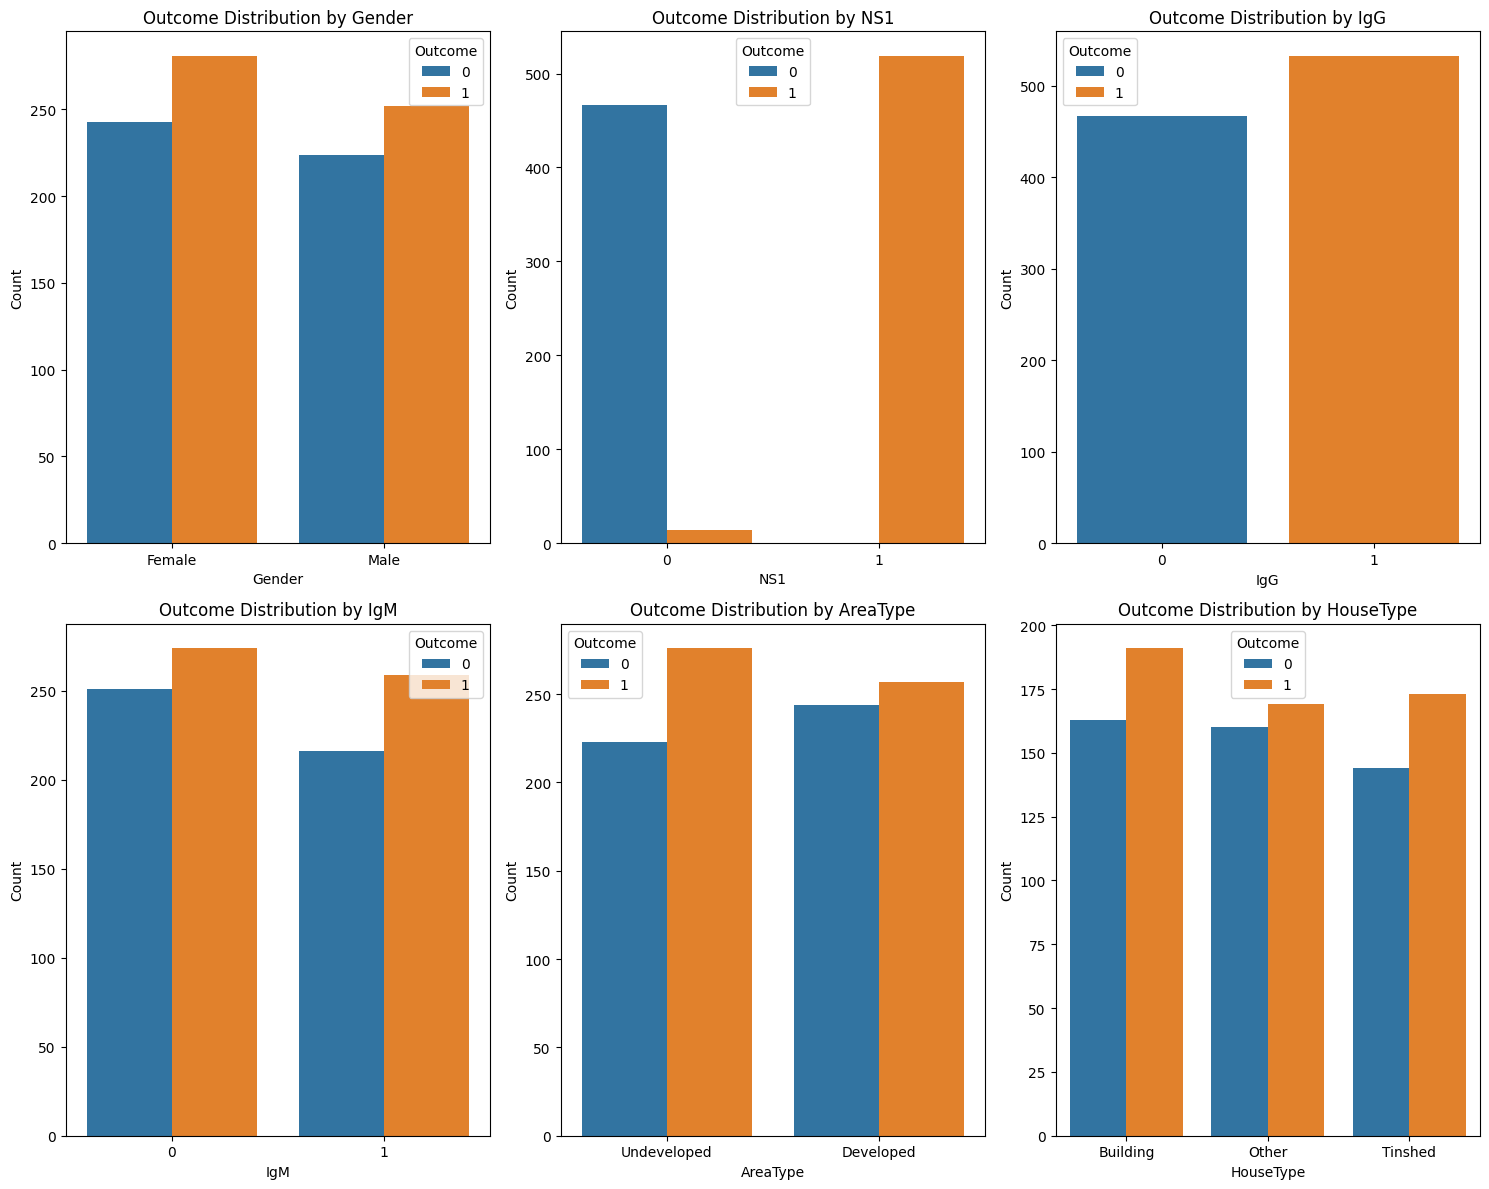

In [34]:
# Setting up the plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot bar chart for each column
cols = ['Gender', 'NS1', 'IgG', 'IgM', 'AreaType', 'HouseType']
for i, col in enumerate(cols):
    sns.countplot(data=data, x=col, hue="Outcome", ax=axes[i])
    axes[i].set_title(f'Outcome Distribution by {col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### **Not cosidering the features "IgG" and "NS1" (after EDA)**
The feature **IgG** directly determines the Outcome. Keeping it would allow the model to learn a trivial mapping rather than meaningful patterns from other features, reducing its ability to generalize to new data. Removing IgG ensures the model relies on more relevant predictors, improving its overall performance.

**Splitting the numerical features and categorical features for imputation and encoding. Numerical and categorical features need differnt kind of imputation and enconding. That's why we split into numerical features and categorical features.**

In [35]:
num_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(include='object').columns

print(num_cols)
print(cat_cols)

Index(['Age', 'NS1', 'IgG', 'IgM', 'Outcome'], dtype='object')
Index(['Gender', 'Area', 'AreaType', 'HouseType', 'District'], dtype='object')


**For uniform distribution of data according to "Age" we create new features and split the data based on that.**

In [36]:
data['AgeCat'] = pd.cut(data['Age'], bins=[-np.inf, 18, 30, 45, np.inf], labels=['child', 'young', 'middle-aged', 'aged'])
data.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome,AgeCat
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0,middle-aged
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0,child
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0,young
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1,aged
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0,young


In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=7, stratify=data['AgeCat'])


In [38]:
print(train['AgeCat'].value_counts(normalize=True) * 100)
print(test['AgeCat'].value_counts(normalize=True) * 100)

AgeCat
aged           32.750
middle-aged    27.250
child          20.125
young          19.875
Name: proportion, dtype: float64
AgeCat
aged           32.5
middle-aged    27.5
young          20.0
child          20.0
Name: proportion, dtype: float64


In [39]:
train_set, val_set = train_test_split(train, test_size=0.2, random_state=7, stratify=train['AgeCat'])

train_set.drop(columns=['AgeCat'], axis=1, inplace= True)
val_set.drop(columns=['AgeCat'], axis=1, inplace=True)

### Separating the dataset into independent and dependent category. Here, **'IgG'** is dropped because it directly determines the outcome.

In [40]:
X_train = train_set.drop(columns=['Outcome', 'IgG'])
y_train = train_set['Outcome']

X_val = val_set.drop(columns=['Outcome', 'IgG'])
y_val = val_set['Outcome']

In [41]:
num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='object').columns


### Impute missing values to maintain data integrity. Encode categorical variables into numerical representations, as models require numeric inputs for training. Scale numerical features to enhance model performance and ensure consistency across different ranges.

In [42]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])

X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])


### Outliers can negatively impact model accuracy by skewing the distribution of data. In this dataset, the **Age** column has a wide range of values, while all other numerical features **(NS1, IgG, IgM)** are binary **(0 or 1)**. Since outlier detection is meaningful for continuous variables, we only check for outliers in the **Age** column to ensure the model's robustness.

In [43]:

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [Gender, Age, NS1, IgG, IgM, Area, AreaType, HouseType, District, Outcome, AgeCat]
Index: []


In [44]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

scaler = StandardScaler()
encoder = OrdinalEncoder()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_val[cat_cols] = encoder.transform(X_val[cat_cols])

### Building the model using LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

### Evaluating model

In [46]:
log_reg.score(X_val, y_val)


0.9875

In [47]:
pred = log_reg.predict(X_val)

<Axes: >

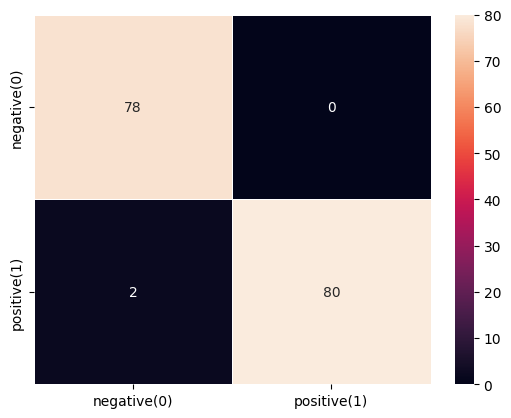

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, pred)
sns.heatmap(cm, annot=True, linewidths=0.5, xticklabels=['negative(0)', 'positive(1)'], yticklabels=[ 'negative(0)' ,'positive(1)'])